# Fetch BTC-USD, ETH-USD, LTC-USD latest data and append to existing data csv

In [8]:
import os
import pandas as pd
import yfinance as yf

def update_data_and_append(ticker, csv_file_path, start_date, end_date):
    if os.path.exists(csv_file_path):
        existing_data = pd.read_csv(csv_file_path)
        last_date = pd.to_datetime(existing_data['Date']).max()
        end_date_timestamp = pd.to_datetime(end_date)  # Convert end_date to Timestamp
        if last_date >= end_date_timestamp:
            print(f"Data for {ticker} is up to date.")
            return
        
        new_data = yf.download(ticker, start=last_date + pd.DateOffset(days=1), end=end_date)
        
        if not new_data.empty:
            combined_data = pd.concat([existing_data, new_data])
            combined_data.to_csv(csv_file_path, index=False)
            print(f"Data for {ticker} updated and appended.")
        else:
            print(f"No new data available for {ticker} in the specified date range.")
    else:
        print(f"CSV file '{csv_file_path}' does not exist.")

In [9]:
# Update data for BTC-USD
btc_csv_path = 'BTC-USD_1d.csv'
update_data_and_append('BTC-USD', btc_csv_path, '2023-01-01', pd.Timestamp.today().strftime('%Y-%m-%d'))

# Update data for ETH-USD
eth_csv_path = 'ETH-USD_1d.csv'
update_data_and_append('ETH-USD', eth_csv_path, '2023-01-01', pd.Timestamp.today().strftime('%Y-%m-%d'))

# Update data for LTC-USD
ltc_csv_path = 'LTC-USD_1d.csv'
update_data_and_append('LTC-USD', ltc_csv_path, '2023-01-01', pd.Timestamp.today().strftime('%Y-%m-%d'))


Data for BTC-USD is up to date.
Data for ETH-USD is up to date.
Data for LTC-USD is up to date.


# Preprocess Data

In [10]:
import os
import pandas as pd

def preprocess_and_save(data, ticker, output_folder="Regression_data"):
    # Preprocess your data here (example: separate date into year, month, day)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Save the preprocessed data in the output folder
    output_file_path = os.path.join(output_folder, f"prep_{ticker}_data.csv")
    data.to_csv(output_file_path, index=False)
    print(f"Preprocessed data for {ticker} saved in {output_file_path}")


In [11]:
ticker = 'BTC-USD'
data = pd.read_csv('BTC-USD_1d.csv')
preprocess_and_save(data, ticker, "Regression_Data")

ticker = 'LTC-USD'
data = pd.read_csv('LTC-USD_1d.csv')
preprocess_and_save(data, ticker, "Regression_Data")

ticker = 'ETH-USD'
data = pd.read_csv('ETH-USD_1d.csv')
preprocess_and_save(data, ticker, "Regression_Data")

Preprocessed data for BTC-USD saved in Regression_Data\prep_BTC-USD_data.csv
Preprocessed data for LTC-USD saved in Regression_Data\prep_LTC-USD_data.csv
Preprocessed data for ETH-USD saved in Regression_Data\prep_ETH-USD_data.csv


# Print features of all 3 datasets

In [12]:
import pandas as pd

def print_features(ticker, input_folder="Regression_data"):
    file_path = os.path.join(input_folder, f"prep_{ticker}_data.csv")
    
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)
        print(f"Features for {ticker} data:")
        print(data.columns.tolist())
    else:
        print(f"Preprocessed data file for {ticker} not found.")

ticker_to_print = 'BTC-USD'
print_features(ticker_to_print)

ticker_to_print = 'ETH-USD'
print_features(ticker_to_print)

ticker_to_print = 'LTC-USD'
print_features(ticker_to_print)


Features for BTC-USD data:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month', 'Day']
Features for ETH-USD data:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month', 'Day']
Features for LTC-USD data:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month', 'Day']


# Visualisation of closing price & trading volume trends for all 3 currencies.

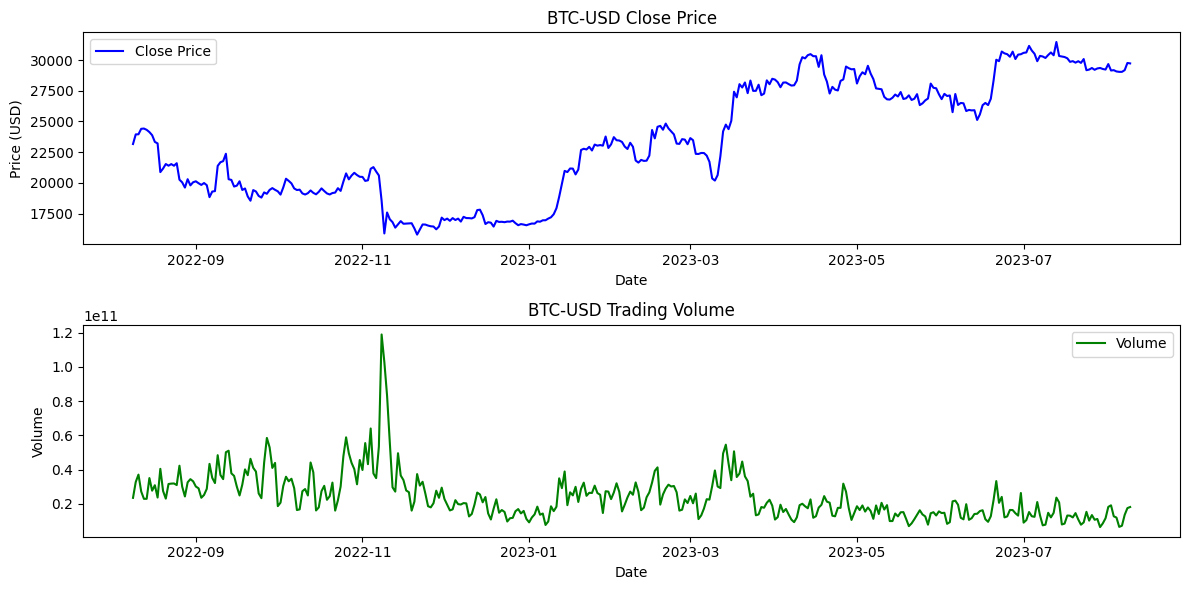

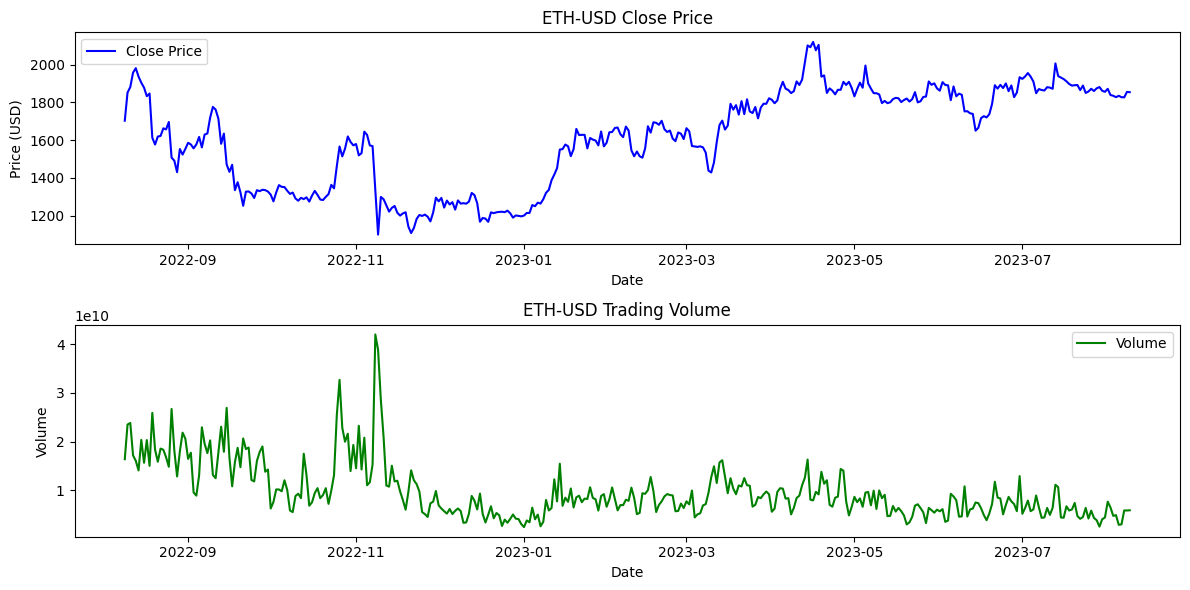

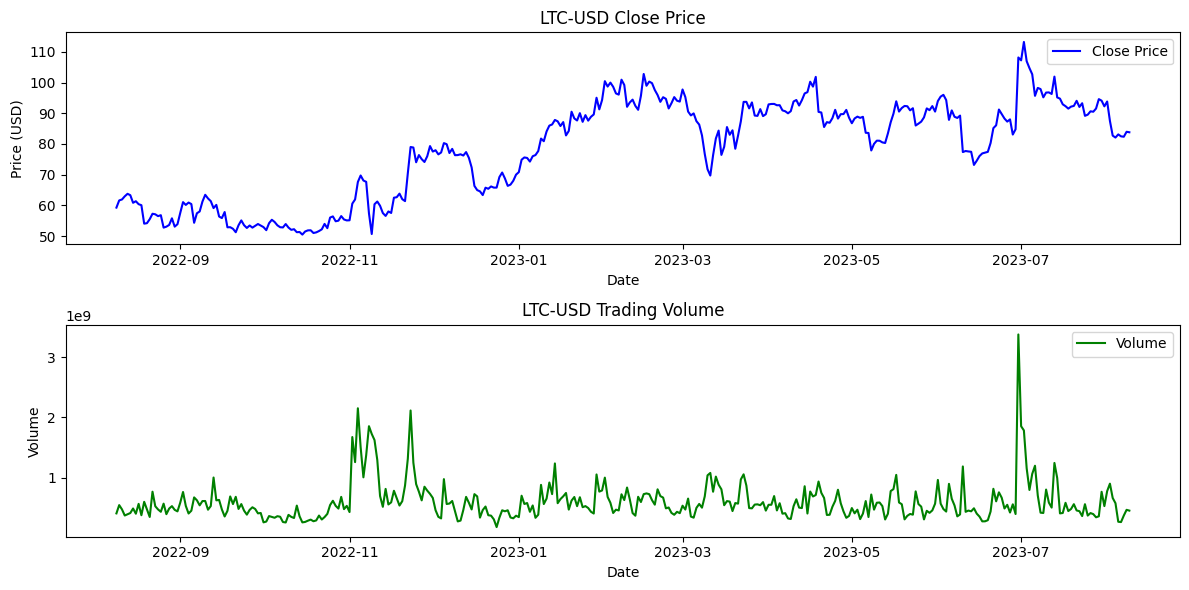

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with your actual file paths
btc_csv_path = 'BTC-USD_1d.csv'
eth_csv_path = 'ETH-USD_1d.csv'
ltc_csv_path = 'LTC-USD_1d.csv'

def plot_cryptocurrency_data(csv_file_path, ticker):
    if os.path.exists(csv_file_path):
        data = pd.read_csv(csv_file_path)
        
        # Extract relevant columns
        date = pd.to_datetime(data['Date'])
        close_price = data['Close']
        volume = data['Volume']
        
        # Plotting
        plt.figure(figsize=(12, 6))
        
        plt.subplot(2, 1, 1)
        plt.plot(date, close_price, label='Close Price', color='blue')
        plt.title(f'{ticker} Close Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        
        plt.subplot(2, 1, 2)
        plt.plot(date, volume, label='Volume', color='green')
        plt.title(f'{ticker} Trading Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"CSV file '{csv_file_path}' does not exist.")

# Plot BTC-USD data
plot_cryptocurrency_data(btc_csv_path, 'BTC-USD')

# Plot ETH-USD data
plot_cryptocurrency_data(eth_csv_path, 'ETH-USD')

# Plot LTC-USD data
plot_cryptocurrency_data(ltc_csv_path, 'LTC-USD')
